SABR model:
$$
\begin{aligned}
    &dF_t = \alpha_t F_t^{\beta} dW_t\\
    &d\alpha_t = v \alpha_t dZ_t\\
    dW_t dZ_t = \rho dt
\end{aligned}
$$

Let us introduce parameters:
$$
\begin{aligned}
&F_m = \sqrt{F K}\\
&\zeta = \dfrac{v}{\alpha}F_m^{1-\beta}\log \dfrac{F}{K}\\
&X(\zeta, \rho) = \log \dfrac{\sqrt{1 - 2 \zeta \rho + \zeta^2} + \zeta - \rho}{1-\rho}\\
&q_1 = \dfrac{(\beta-1)^2 \alpha^2 F_m^{2\beta - 2}}{24}\\
&q_2 = \dfrac{\rho \beta \alpha v F_m^{\beta - 1}}{4}\\
&q_3 = \dfrac{2-3\rho^2}{24}v^2\\
&S = 1 + T(q_1 + q_2 + q_3)\\
&D = F_m^{1-\beta}\left[ 1 + \dfrac{(\beta-1)^2}{24} \log^2 \dfrac{F}{K} + \dfrac{(\beta-1)^4}{1920}\log^4 \dfrac{F}{K}\right]\\
\end{aligned}
$$
$$
\sigma = \dfrac{\alpha S}{D} \times \dfrac{\zeta}{X(\zeta, \rho)}
$$

In [1]:
from sabr import SABR
from sabr_calibration import SABRCalibrator

from heston import Heston
from heston_calibration import HestonCalibrator

import numpy as np
from matplotlib import pyplot as plt

## SABR calibration example

In [2]:
#sabr model parameters
alpha = 0.2
v = 0.9
beta = 0.9
rho = -0.5

sabr_params_0 = np.asarray([alpha, v, beta, rho])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 32)

In [3]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [4]:
c0, iv0 = sabr_0( Kn, F, T )

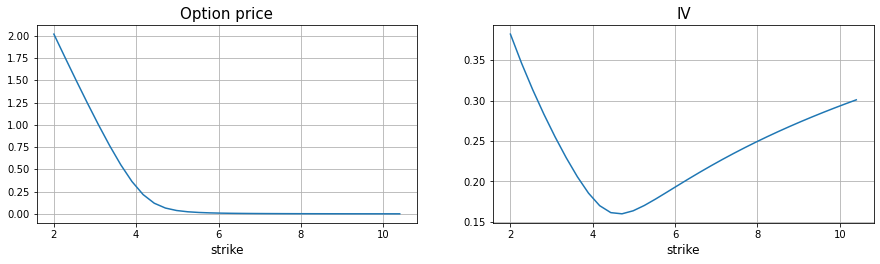

In [5]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, c0)
ax1.grid()
ax1.set_title("Option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, iv0)
ax2.grid()
ax2.set_title("IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration:

In [6]:
#sabr calibrator object
sabr_calib = SABRCalibrator(r)

 23%|██████████████████████████████████████▋                                                                                                                                 | 23/100 [00:00<00:00, 387.11it/s]


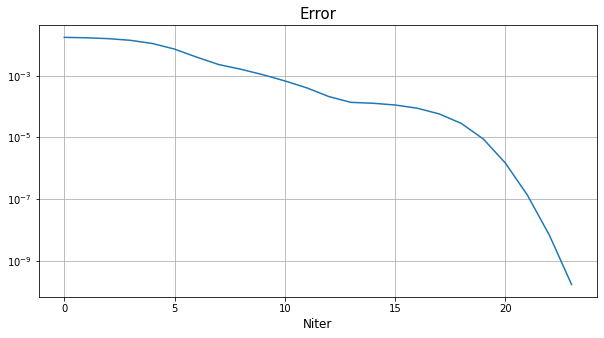

In [7]:
#calibrate sabr model
fs = sabr_calib.fit_iv(iv0, Kn, F, T, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [8]:
print("real params:", sabr_params_0)
print("calib params:", sabr_calib.sabr_params)

real params: [ 0.2  0.9  0.9 -0.5]
calib params: [ 0.2  0.9  0.9 -0.5]


In [9]:
#predict option prices
c1, iv1 = sabr_calib.predict(Kn, F, T )

In [10]:
c1 - c0

array([-8.33066949e-12, -5.93747274e-12, -1.86561877e-12,  4.09761114e-12,
        1.18571819e-11,  2.05346851e-11,  2.76112466e-11,  2.82045498e-11,
        1.77662329e-11,  1.29052324e-12, -8.97804053e-12, -1.10029763e-11,
       -9.46676071e-12, -7.28986316e-12, -5.39043810e-12, -3.91699173e-12,
       -2.81413781e-12, -1.99441158e-12, -1.38278972e-12, -9.23011667e-13,
       -5.74110204e-13, -3.07118914e-13, -1.01176012e-13,  5.89112092e-14,
        1.83967425e-13,  2.82301960e-13,  3.59741750e-13,  4.20868201e-13,
        4.69138617e-13,  5.07262635e-13,  5.37184880e-13,  5.60574157e-13])

In [11]:
iv1 - iv0

array([-3.07619485e-11, -1.55871427e-11, -3.56320529e-12,  5.81612536e-12,
        1.27982624e-11,  1.73567272e-11,  1.90928939e-11,  1.71307690e-11,
        1.06065434e-11,  8.75216566e-13, -7.81075205e-12, -1.30117306e-11,
       -1.53158597e-11, -1.58670854e-11, -1.54150859e-11, -1.43700329e-11,
       -1.29551647e-11, -1.12980181e-11, -9.47572576e-12, -7.53616614e-12,
       -5.51292345e-12, -3.42850748e-12, -1.29907196e-12,  8.62809824e-13,
        3.04761771e-12,  5.24913446e-12,  7.46119833e-12,  9.67881331e-12,
        1.18979271e-11,  1.41173184e-11,  1.63333791e-11,  1.85446658e-11])

In [12]:
#heston parameters
v_0 = 0.01
theta = 0.02
rho = -0.1
k = 2.0
sigma = 0.23

heston_params = np.asarray([v_0, theta, rho, k, sigma])

In [13]:
#heston model object
heston = Heston(heston_params, r)

In [14]:
#heston option price and iv
ch, ivh = heston(Kn, F, T)

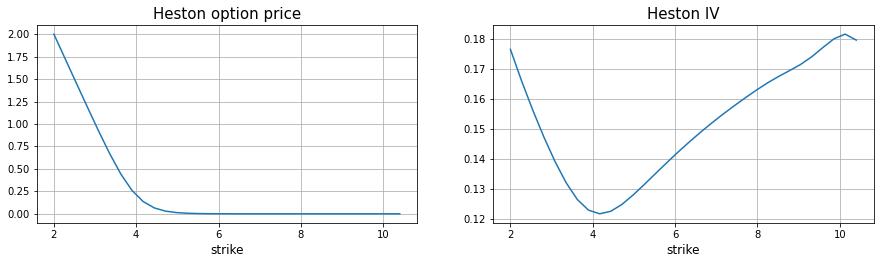

In [15]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch)
ax1.grid()
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh)
ax2.grid()
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration to heston data

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 644.00it/s]


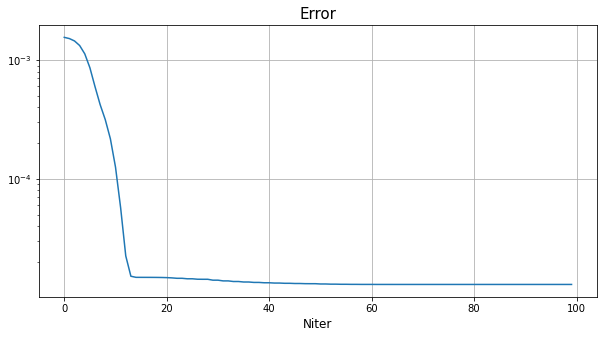

In [16]:
#calibrating sabr to heston
fs = sabr_calib.fit_price(ch, Kn, F, T, typ=True, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [17]:
sabr_calib.sabr_params

array([ 0.12075105,  0.40205302,  0.999999  , -0.10335875])

In [18]:
#predicting 
c1, iv1 = sabr_calib.predict(Kn, F, T )

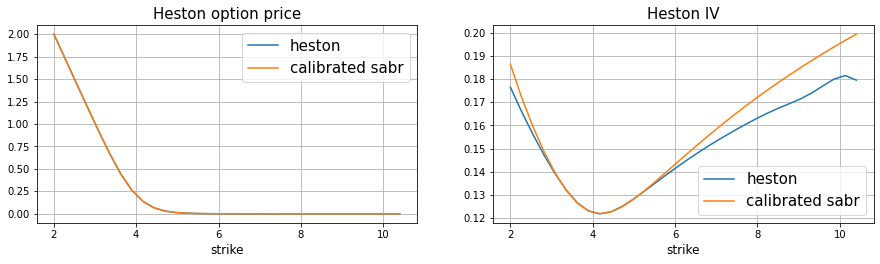

In [19]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch, label='heston')
ax1.plot(Kn, c1, label='calibrated sabr')
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh, label='heston')
ax2.plot(Kn, iv1, label='calibrated sabr')
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

In [20]:
err_c = np.linalg.norm(c1 - ch) / np.linalg.norm(ch) * 100
err_iv = np.linalg.norm(iv1 - ivh) / np.linalg.norm(ivh) * 100

In [21]:
print(f"error in option price = {err_c:.4f}%,\nerror in iv = {err_iv:.4f}%")

error in option price = 0.0119%,
error in iv = 5.4021%
